In [262]:
# some popular unsupervised learning algorithms
# 1) K-means clustering 
# 2) Hierarchical clustering
# 3) DBSCAN clustering
# 4) Apriori Algorithm(Association in ML)
# 5) PCA(Principle component analysis)

In [263]:
# cluster means groupping krna

# K-Means Clustering

In [265]:
# k-means clustering is an unsupervised learning algorithm, which groups the unlabeled
# dataset into different clusters.
# k means clustering is used only when data is linearly separable

In [266]:
# k defines the number of pre-defined clusters that need to be created in the process

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [268]:
dataset=pd.read_csv('Iris_raw.csv')

In [269]:
dataset.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


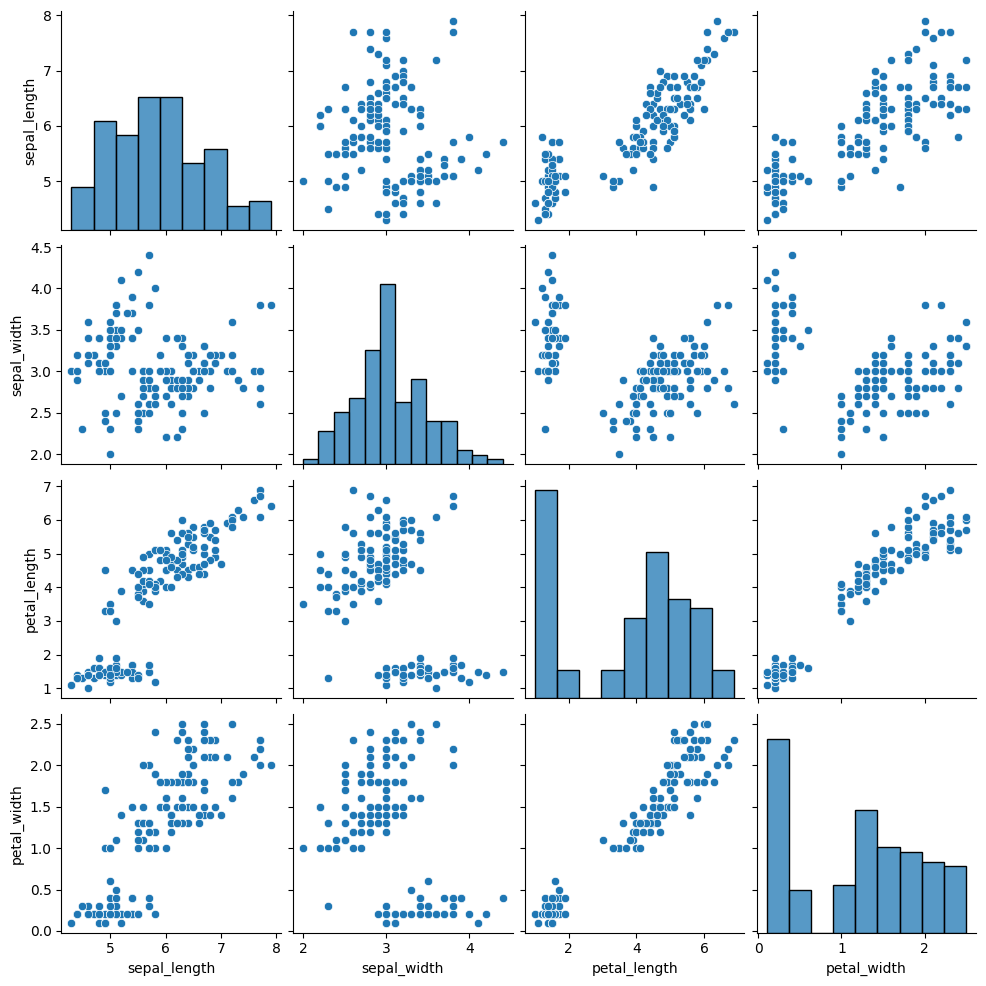

In [270]:
sns.pairplot(data=dataset)
plt.show()

In [271]:
# training and testing is used in supervised learning algorithm

In [272]:
from sklearn.cluster import KMeans

In [273]:
wcss=[]

for i in range(2,21):
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(dataset)
    wcss.append(km.inertia_)  # yahi hota he wcss ki value
    

In [274]:
wcss

[152.36870647733906,
 78.94084142614601,
 57.35501904761905,
 50.03412205564044,
 41.79530692640693,
 37.95532847503374,
 30.276876569485268,
 28.57896739130435,
 27.18698351648352,
 25.217630563880565,
 23.372116133866136,
 22.456415089812154,
 22.256863316173742,
 19.05975288600289,
 18.458664502164503,
 18.215855311355316,
 16.292868686868687,
 17.08967769322181,
 15.782760101010103]

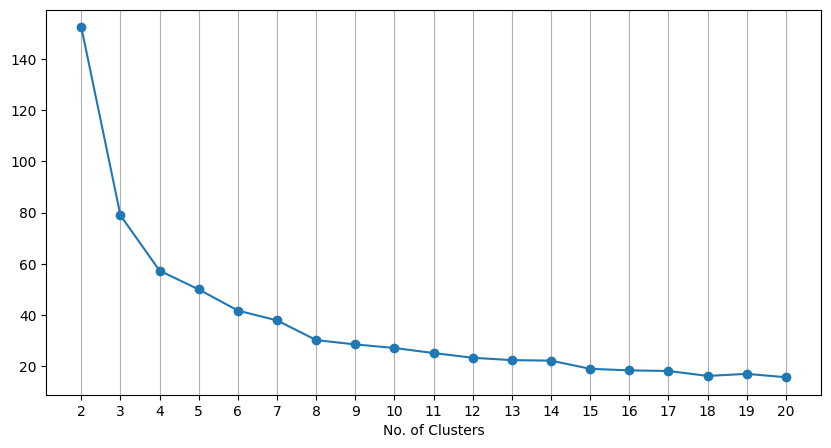

In [275]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,21)],wcss,marker='o')  # graph will look like elbow(hand)
plt.xlabel('No. of Clusters')
plt.xticks([i for i in range(2,21)])
plt.grid(axis='x')
plt.show()
# elbow point is x=3 kyuki uske baad graph decrease ho raha heaur badme const ho jayega

In [276]:
kmn=KMeans(n_clusters=3)
dataset['Predict']=kmn.fit_predict(dataset)

In [277]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,Predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


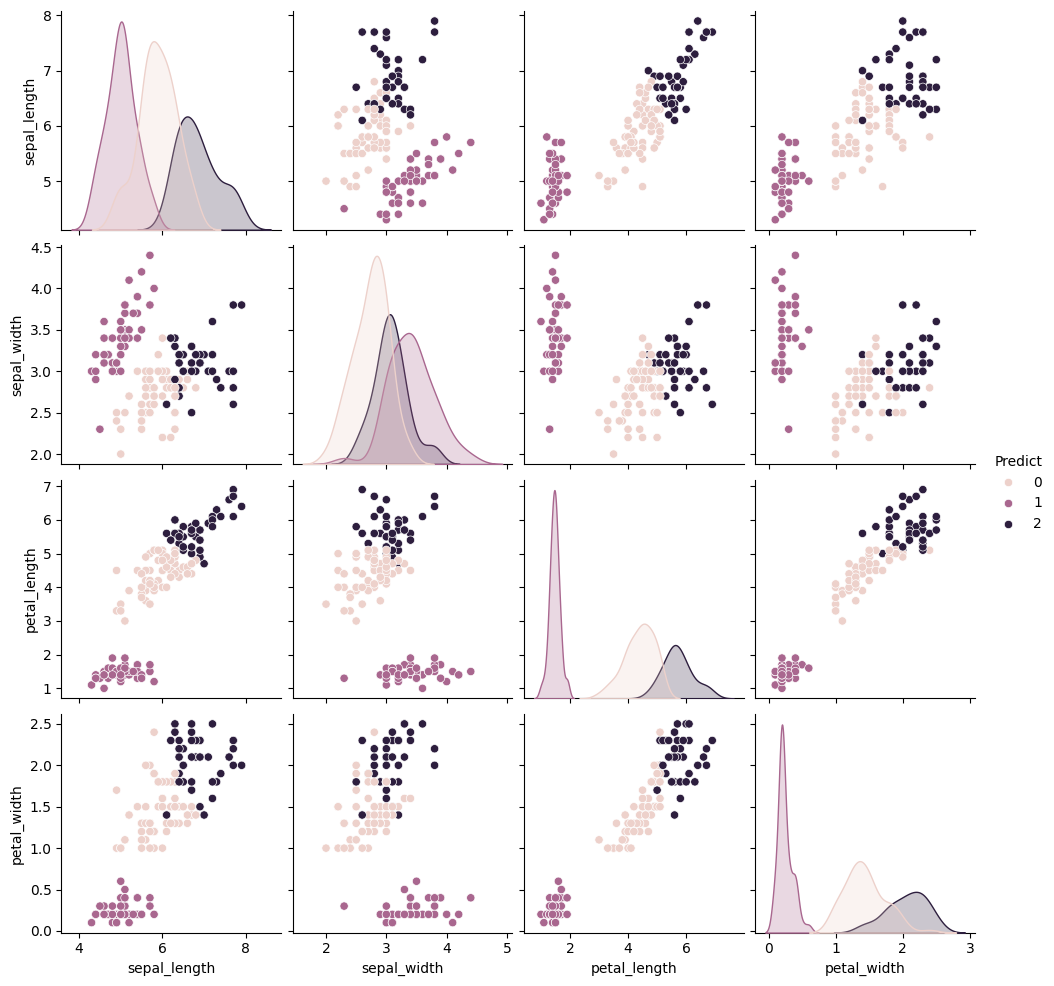

In [278]:
sns.pairplot(data=dataset,hue='Predict')
plt.show()

In [279]:
org_dataset =pd.read_csv('Iris.csv')

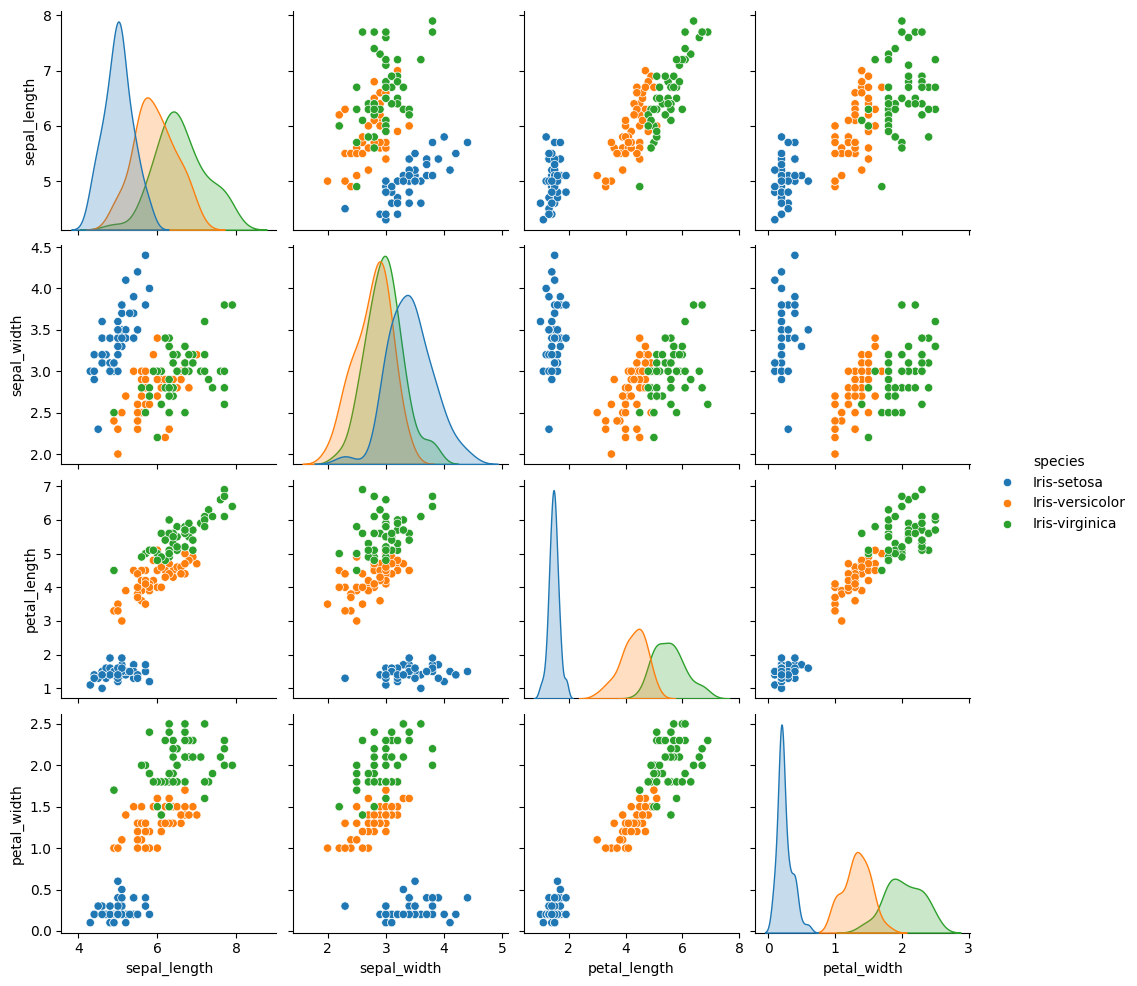

In [280]:
sns.pairplot(data=org_dataset,hue='species')
plt.show()

# Hierarchical Clustering

In [282]:
# if data is linearly separable we use hierarchical clustering

In [283]:
# It is used to group thw unlabeled datasets into a cluster and also known as hierarchical cluster 
# analysis or HCA

In [284]:
# In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this 
# tree-shaped structure is known as the dendrogram.

In [285]:
# The dendrogram is a tree-like structure that is mainly used to store each step as a 
# memory that the HC algorithm performs.
# The dendrogram plot, the Y-axis shows the Euclidean distance between the data points, and the X-axis shows all the data
# points of the given dataset

In [286]:
# Hierarchical clustering techinique has two approaches :
# 1) Agglomerative: Agglomerative is a bottom-up approach, in which the algorithm starts with taking all
# data points as single clusters and merging them until one cluster is left.
# 2) Divisive: Divisive algorithm is the reverse of the agglomerative algorithm as it is a top-down approach

In [287]:
# Measure for the distance between two clusteres
# The closest  distance between the two clusters is crucial for the hierarchical clustering. 
# There are various ways to calculate the distance between two clusters, and these ways decide the 
# rule for clustering. These measures are called Linkage methods.
# 1) Single Linkage(takes min. distance)
# 2) Complete Linkage(takes max. distance)
# 3) Average Linkage(takes avg. distance)
# 4) Centroid Linkage
                                                    

In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [289]:
dataset=pd.read_csv('Iris_raw.csv')

In [290]:
dataset.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


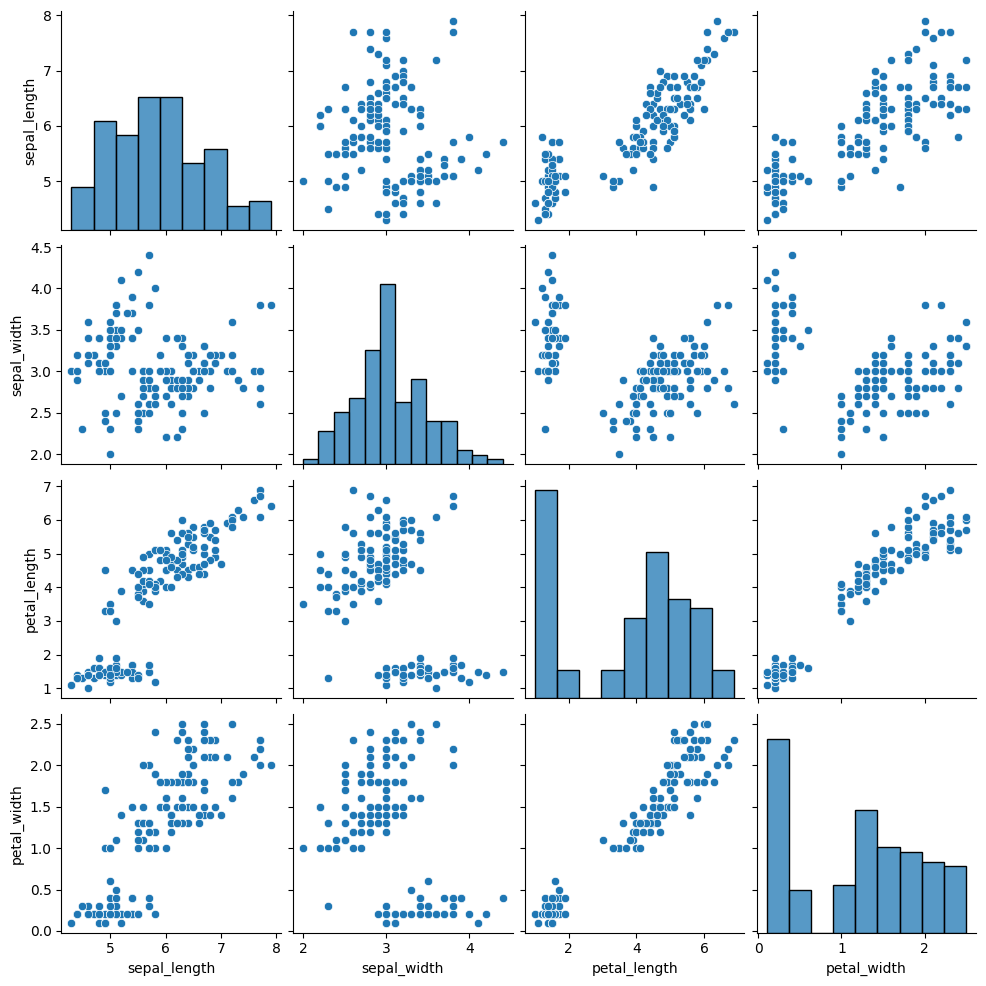

In [291]:
sns.pairplot(data=dataset)
plt.show()

In [292]:
!pip install scipy

In [293]:
import scipy.cluster.hierarchy as sc

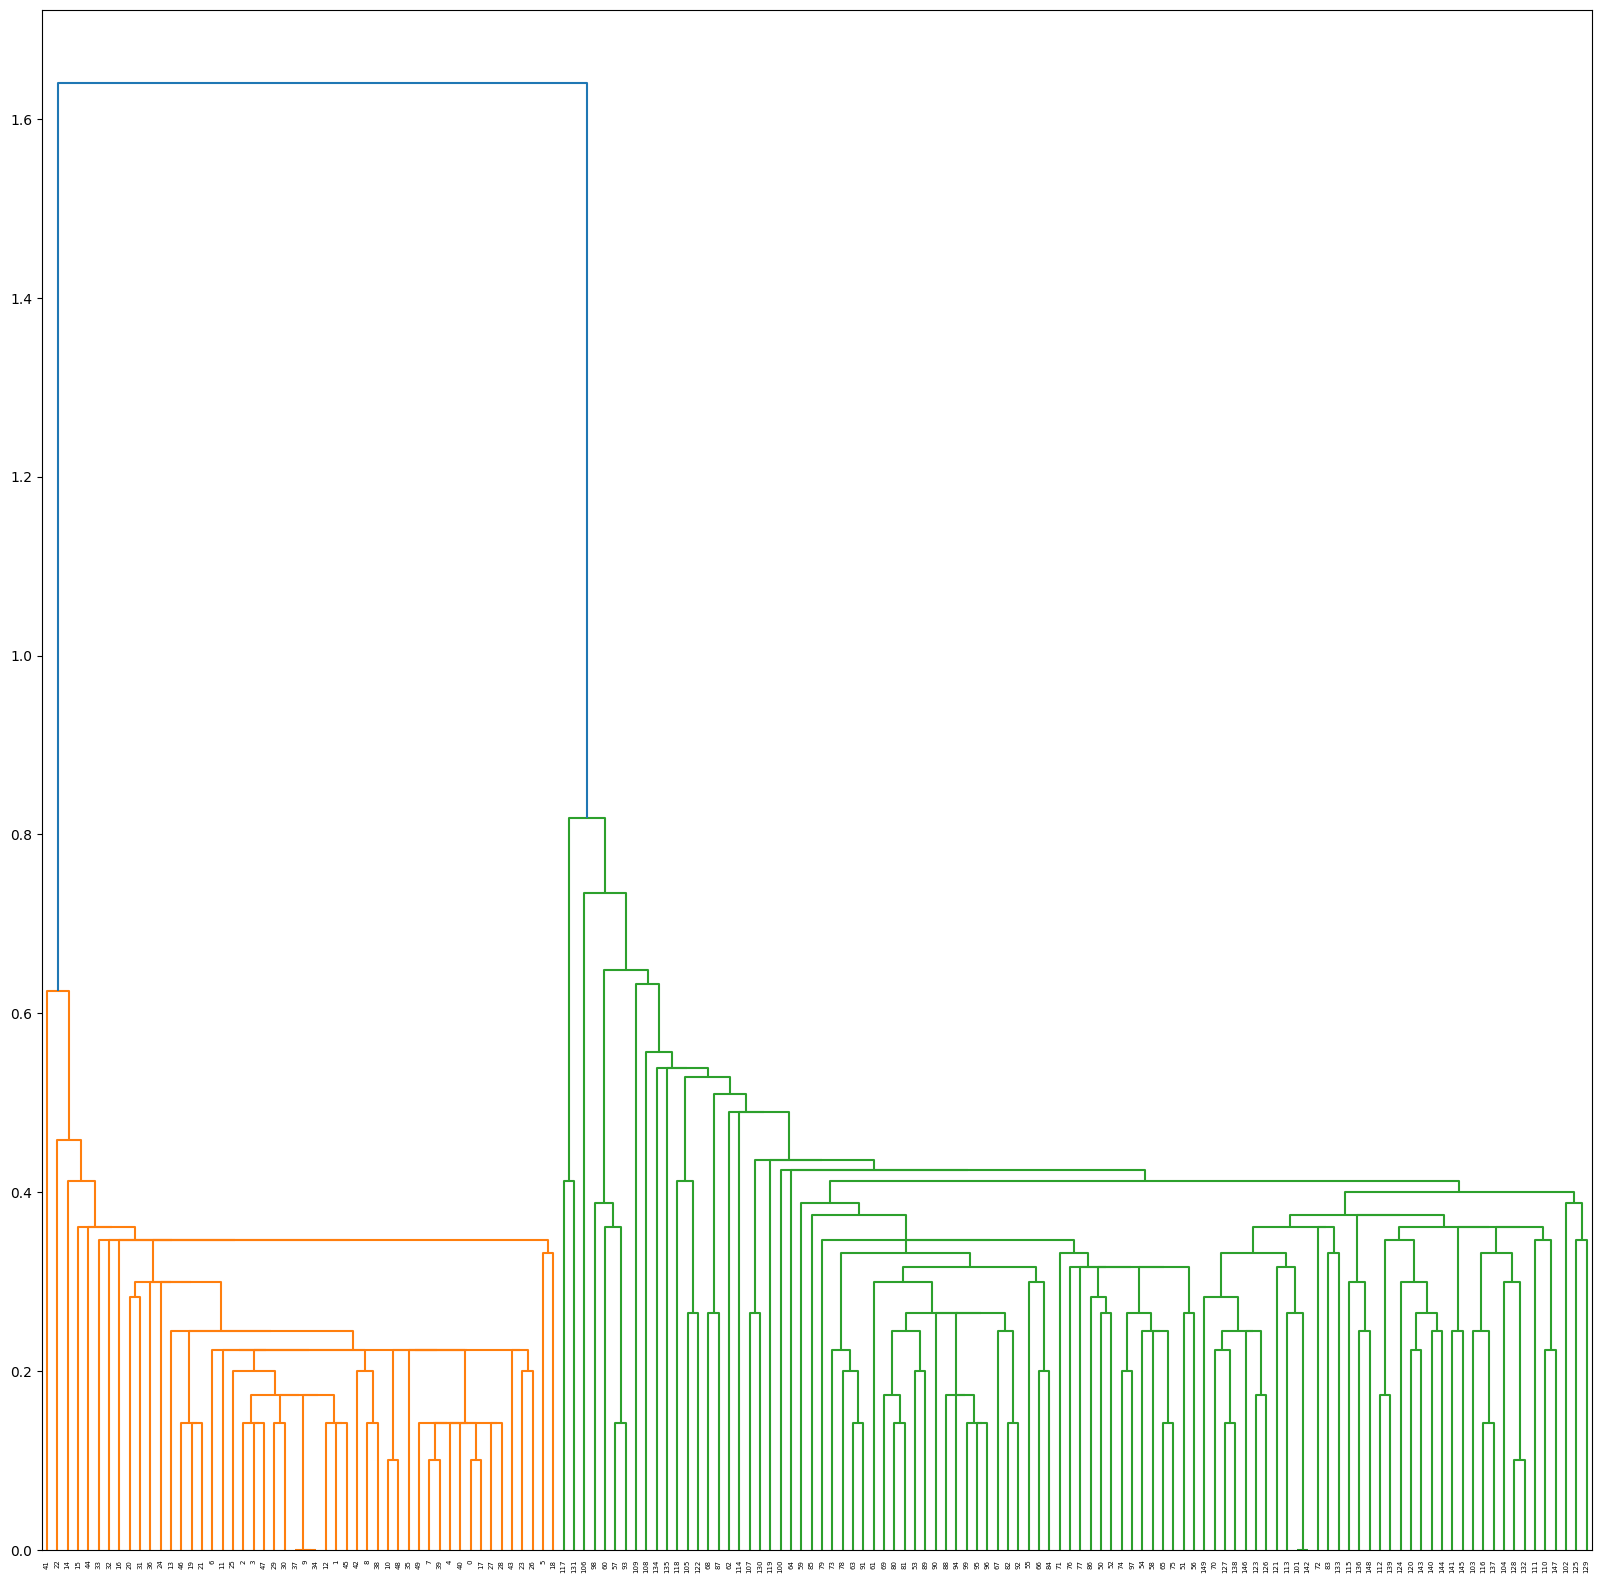

In [294]:
plt.figure(figsize=(20,20))
sc.dendrogram(sc.linkage(dataset,method='single',metric='euclidean'))
plt.show()

In [295]:
from sklearn.cluster import AgglomerativeClustering

In [296]:
ac = AgglomerativeClustering(n_clusters=2,linkage='single')
dataset['Predict']=ac.fit_predict(dataset)

In [297]:
dataset.head(2)

,sepal_length,sepal_width,petal_length,petal_width,Predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1


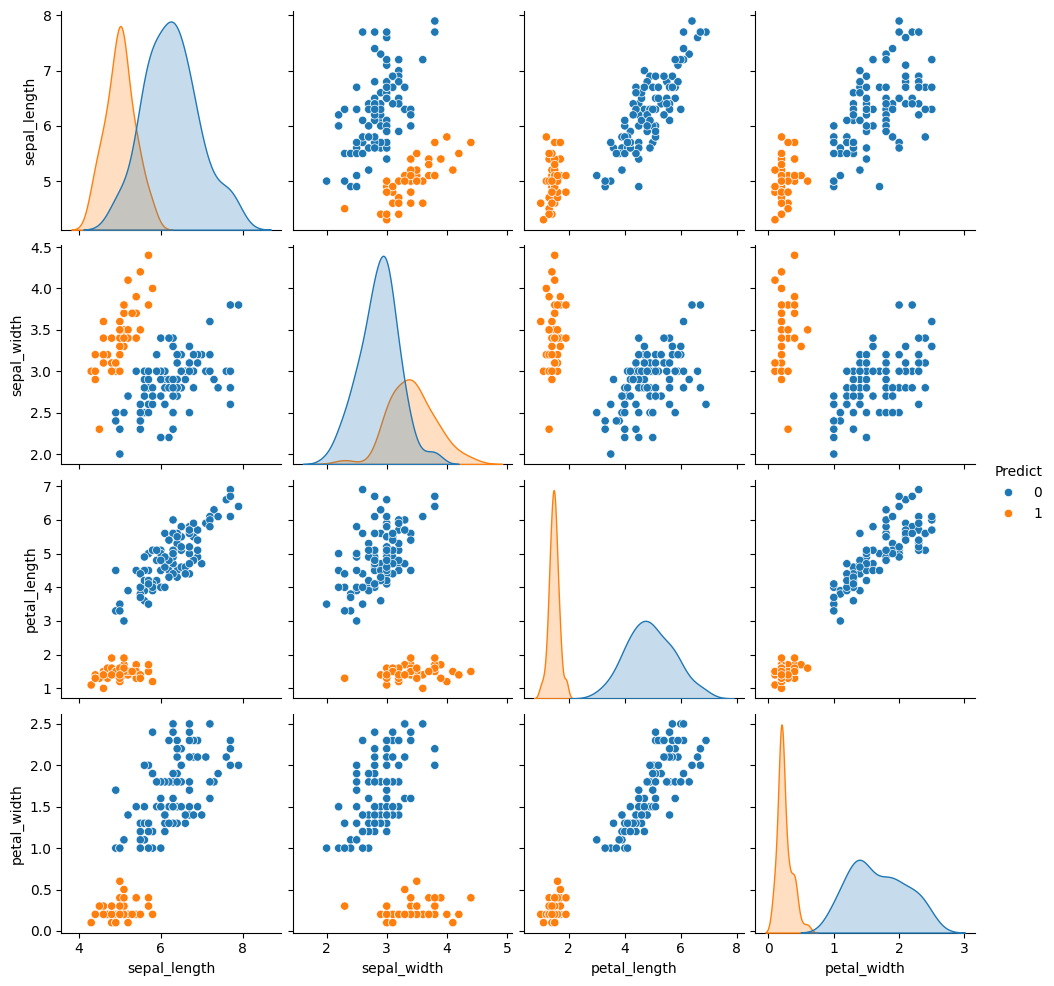

In [298]:
sns.pairplot(data=dataset,hue='Predict')
plt.show()

# DBSCAN Clustering

In [300]:
# Density-Based Spatial Clustering of Applications with Noise The clusters found by DBSCAN can be any shape,
# which can deal with some special cases that other methods cannot.

In [301]:
# used when data is non-linearly separable

In [302]:
import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
from sklearn.datasets import make_moons

In [304]:
x,y=make_moons(n_samples=250,noise=0.05)

In [305]:
x

array([[-9.95871228e-01,  2.23890825e-01],
       [-7.25015387e-01,  6.78888873e-01],
       [ 3.40297434e-01, -3.44995600e-02],
       [ 1.94745084e+00,  3.62176615e-01],
       [-1.99376386e-02,  4.23350996e-01],
       [-7.39022292e-01,  7.09219993e-01],
       [-1.01338898e+00,  4.87198466e-01],
       [ 4.84726969e-01, -3.58313296e-01],
       [-9.36263831e-01,  4.07159747e-01],
       [ 1.35223600e+00, -4.54035775e-01],
       [ 9.13305878e-02,  3.92935793e-01],
       [-8.76158394e-02,  4.13059394e-01],
       [ 4.68458855e-01, -3.80571149e-01],
       [-8.95121309e-01,  3.45574422e-01],
       [ 5.09129170e-01, -2.53164530e-01],
       [ 3.68253391e-01, -3.22927900e-01],
       [ 6.53760303e-01, -5.00436581e-01],
       [ 6.31033244e-02,  3.21831485e-01],
       [-4.24792267e-01,  8.43918227e-01],
       [ 1.50255266e-03,  1.03930822e+00],
       [ 2.01556351e+00,  1.94074785e-01],
       [ 1.98431317e+00,  1.54431530e-01],
       [ 1.27058636e+00, -5.03292109e-01],
       [-7.

In [306]:
y

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0])

In [307]:
import pandas as pd

In [308]:
df={'data1':x[:,0],'data2':x[:,1]}

In [309]:
dataset=pd.DataFrame(df)

In [310]:
dataset.head(2)

,data1,data2
0,-0.995871,0.223891
1,-0.725015,0.678889


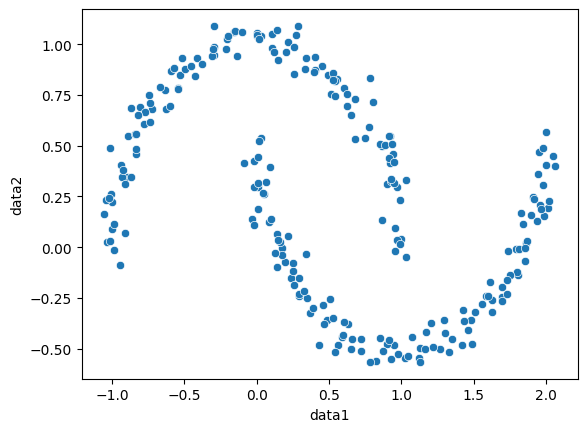

In [311]:
sns.scatterplot(x='data1',y='data2',data=dataset)
plt.show()

In [312]:
from sklearn.cluster import DBSCAN


In [313]:
db=DBSCAN(eps=0.5,min_samples=5)
dataset['Predict']=db.fit_predict(dataset)

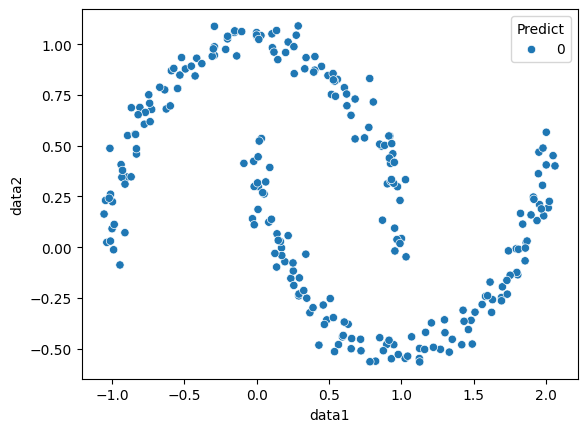

In [314]:
sns.scatterplot(x='data1',y='data2',data=dataset,hue='Predict')
plt.show()

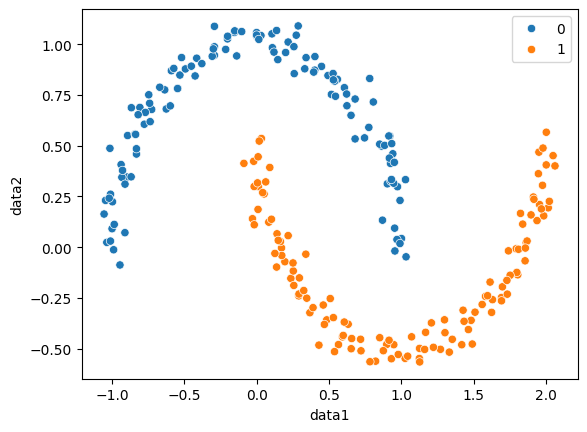

In [315]:
sns.scatterplot(x='data1',y='data2',data=dataset,hue=y)
plt.show()

# Silhouette Score

In [377]:
# Silhouette referes to a method of Interpretation and validation of consistency within 
# clusters of data. 
# Silhouette coefficient or silhouette score is a metric used to calculate the 
# goodness of a clustering technique
# Its value ranges from -1 to 1

In [379]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [381]:
dataset=pd.read_csv('Iris_raw.csv')

In [383]:
dataset.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


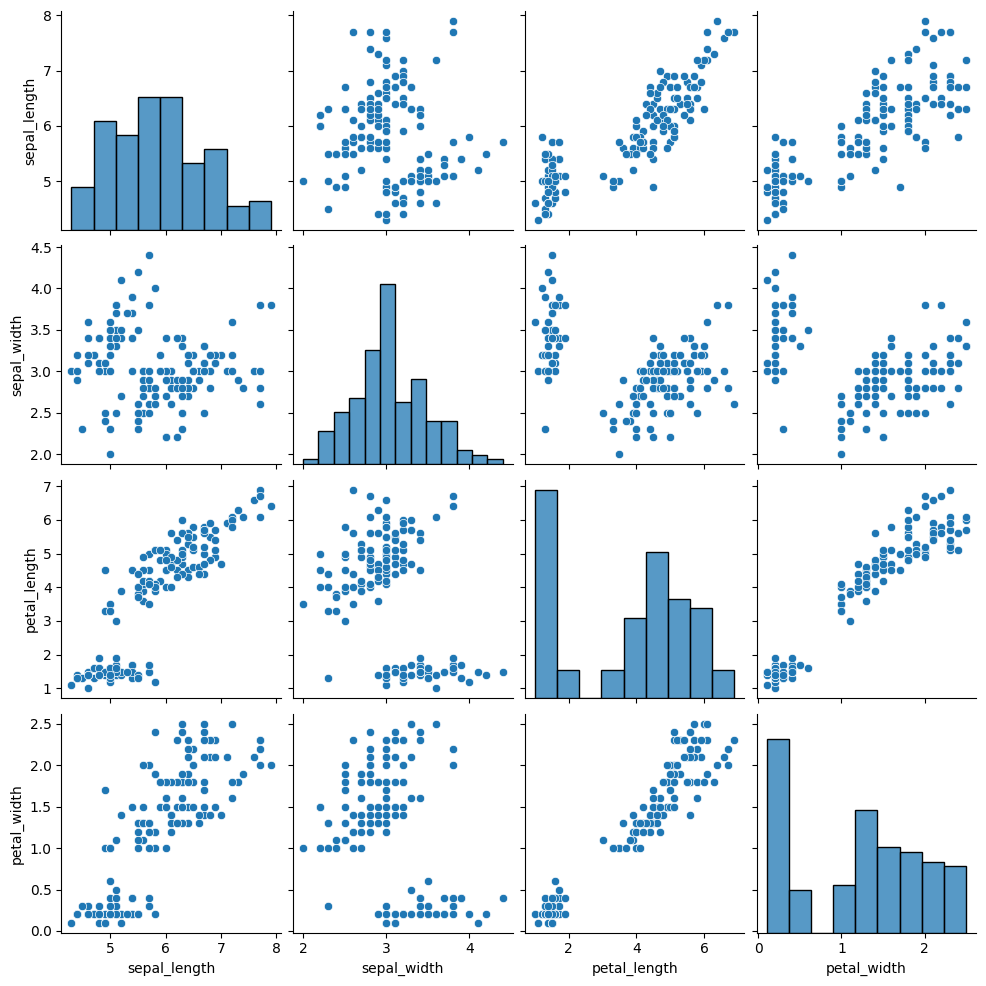

In [385]:
sns.pairplot(data=dataset)
plt.show()

In [387]:
from sklearn.cluster import KMeans

In [389]:
wcss=[]

for i in range(2,21):
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(dataset)
    wcss.append(km.inertia_)  # yahi hota he wcss ki value
    

In [391]:
wcss

[152.36870647733906,
 78.94506582597731,
 57.47327326549492,
 46.56163015873016,
 42.56646318681319,
 36.966626495726494,
 30.227724598930482,
 31.56822544283414,
 26.437340909090913,
 24.39661325439267,
 23.36011732711733,
 22.015488415972115,
 21.00235186382245,
 20.659108558108564,
 20.21559100050277,
 17.99355415009827,
 16.89084759358289,
 16.07870634920635,
 16.54130158730159]

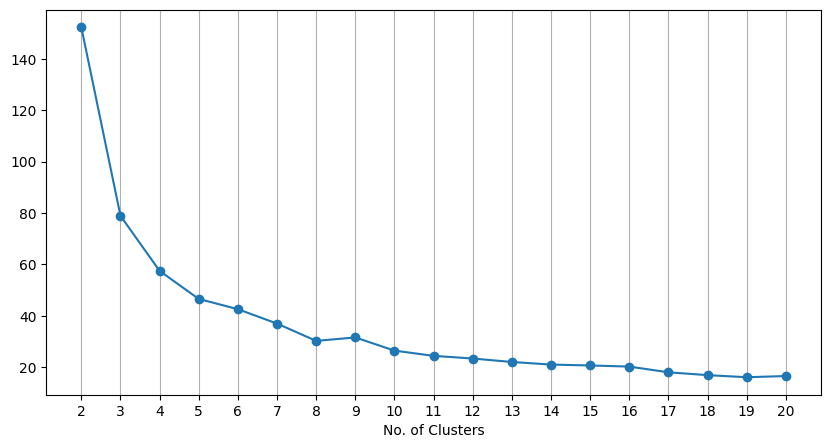

In [393]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,21)],wcss,marker='o')  # graph will look like elbow(hand)
plt.xlabel('No. of Clusters')
plt.xticks([i for i in range(2,21)])
plt.grid(axis='x')
plt.show()
# elbow point is x=3 kyuki uske baad graph decrease ho raha heaur badme const ho jayega

In [395]:
kmn=KMeans(n_clusters=3)
dataset['Predict']=kmn.fit_predict(dataset)

In [409]:
kmn.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [411]:
from sklearn.metrics import silhouette_score

In [413]:
silhouette_score(dataset,labels=kmn.labels_)

np.float64(0.6844657470953514)

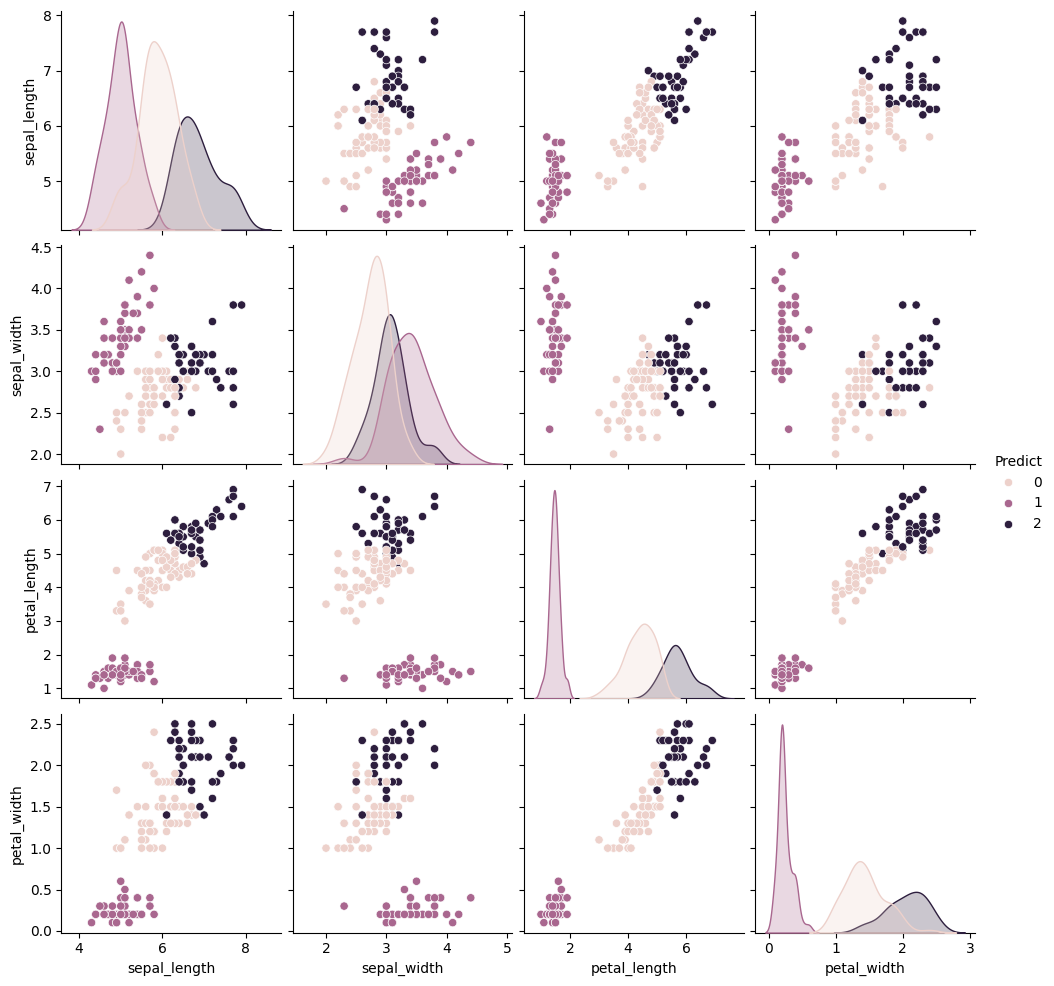

In [399]:
sns.pairplot(data=dataset,hue='Predict')
plt.show()

In [421]:
ss=[]
no_c=[j for j in range(2,21)]
for i in range(2,21):
    km1=KMeans(n_clusters=i)
    km1.fit(dataset)
    ss.append(silhouette_score(dataset,km1.labels_))

In [423]:
ss

[np.float64(0.6200503119051588),
 np.float64(0.6844657470953514),
 np.float64(0.5767737296142547),
 np.float64(0.4525206173208814),
 np.float64(0.4131341990697483),
 np.float64(0.35451749662377713),
 np.float64(0.33068392735663105),
 np.float64(0.37428935515001255),
 np.float64(0.3306563217085205),
 np.float64(0.3084114983210661),
 np.float64(0.259949989820752),
 np.float64(0.2875734904532436),
 np.float64(0.27722500154758317),
 np.float64(0.27768030864929794),
 np.float64(0.2528443563595826),
 np.float64(0.3054848883704866),
 np.float64(0.26211972648842125),
 np.float64(0.287572333088296),
 np.float64(0.2516242890334112)]

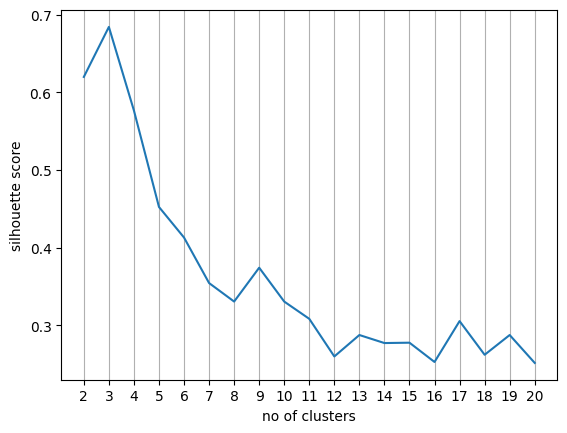

In [435]:
plt.plot(no_c,ss)
plt.xlabel("no of clusters")
plt.ylabel('silhouette score')
plt.xticks(no_c)
plt.grid(axis='x')
plt.show()